<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/salary-prediction-linear-regression/blob/main/Salary_prediction_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
df = pd.read_csv('/content/salary_data.csv')

In [103]:
print(df.shape[0])

30


In [104]:
X = df['YearsExperience']
y = df['Salary']

In [105]:
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [106]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [107]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
model = Sequential(
    [
        tf.keras.Input(shape=(1,)),
        Dense(1, activation='linear')
    ],
    name='salary_model'
)

In [109]:
model.summary()

Model: "salary_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1)
)

In [113]:
print(type(X_train))

<class 'pandas.core.series.Series'>


In [115]:
# Ensure input is 2D before scaling
if X_train.ndim == 1:
    X_train = X_train.to_numpy().reshape(-1, 1)
    y_train = y_train.to_numpy().reshape(-1, 1)
    X_test = X_test.to_numpy().reshape(-1, 1)
    y_test = y_test.to_numpy().reshape(-1, 1)

# Apply standard scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [116]:
print(type(X_train))

<class 'numpy.ndarray'>


In [117]:
model.fit(X_train_scaled, y_train_scaled, epochs=600)

Epoch 1/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 1.9139
Epoch 2/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.6512
Epoch 3/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.4145
Epoch 4/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.1879
Epoch 5/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9901
Epoch 6/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8124
Epoch 7/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6524
Epoch 8/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5136
Epoch 9/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3974
Epoch 10/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.3012
Epoch 11/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2221
Epoch 12/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1595
Epoch 13/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1134
Epoch 14/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0826
Epoch 15/600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0644
Epoch 16/600
1/1 ━

In [118]:
train_pred = model.predict(X_train_scaled)
print(train_pred)
print(y_train_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[-1.0025936 ]
 [-0.6038348 ]
 [ 0.23355876]
 [-0.24495183]
 [-0.68358654]
 [-1.4412283 ]
 [-0.6038348 ]
 [ 0.153807  ]
 [ 1.5893388 ]
 [ 0.95132464]
 [-1.2817248 ]
 [-0.4044554 ]
 [ 1.2703316 ]
 [-0.28482774]
 [ 1.3899593 ]
 [ 0.5126899 ]
 [-0.3247036 ]
 [ 2.2273529 ]
 [-0.08544831]
 [-0.28482774]
 [-1.0823454 ]]
[[-1.20287093]
 [-0.62972127]
 [ 0.49826594]
 [-0.52591321]
 [-0.40505322]
 [-1.22445167]
 [-0.23591224]
 [-0.17353289]
 [ 1.53567707]
 [ 1.09626495]
 [-1.28793369]
 [-0.52166007]
 [ 1.21554971]
 [-0.53079644]
 [ 1.70820481]
 [ 0.9256275 ]
 [-0.28423261]
 [ 2.04605358]
 [-0.36720817]
 [-0.57659643]
 [-1.05976073]]


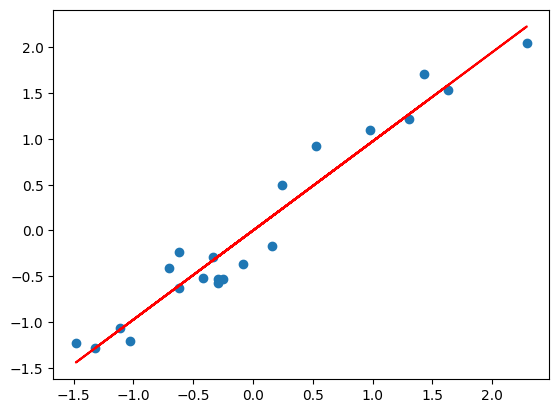

In [123]:
plt.scatter(X_train_scaled, y_train_scaled)
plt.plot(X_train_scaled, train_pred, c='r')
plt.show()

In [124]:
test_pred = model.predict(X_test_scaled)
print(test_pred)
print(y_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[ 2.3071048 ]
 [ 0.831697  ]
 [ 0.47281405]
 [-0.72346246]
 [ 1.9083458 ]
 [ 1.7089664 ]
 [-1.3614767 ]
 [ 0.07405522]
 [ 1.9482218 ]]
[[ 2.02561489]
 [ 0.83891075]
 [ 0.43033388]
 [-0.54320143]
 [ 1.83253032]
 [ 1.38409998]
 [-0.95421991]
 [-0.09835474]
 [ 1.66185349]]


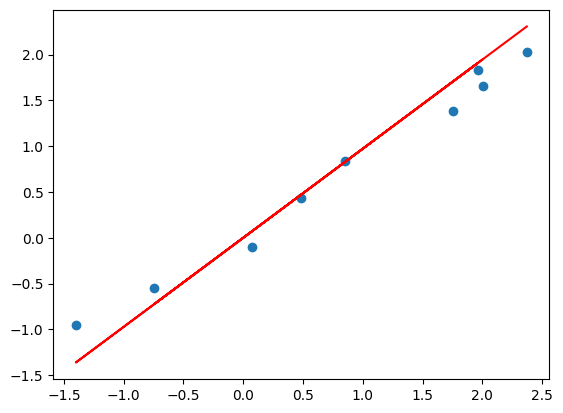

In [125]:
plt.scatter(X_test_scaled, y_test_scaled)
plt.plot(X_test_scaled, test_pred, c='r')
plt.show()

In [128]:
print(mean_squared_error(y_train_scaled, train_pred))
print(mean_squared_error(y_test_scaled, test_pred))

0.053779936941884945
0.05582927358587227


In [130]:
print(r2_score(y_train_scaled, train_pred))
print(r2_score(y_test_scaled, test_pred))

0.946220063058115
0.9467495503092048
